<h2 align="center">URBAN DRINKING WATER QUALITY ANALYSIS</h2>

## 1.Abstract:

### Problem:

This study focuses on the critical issue of drinking water quality in urban areas, identifying the main elements that contribute to its variation and assessing the impact of seasonal fluctuations. As urban populations rise, the strain on water infrastructure causes serious public health issues. 

### Methodology:

This study employs a comprehensive dataset of urban water quality metrics, which are examined using statistical and spatial analysis methods, to identify the primary reasons of water quality changes. Seasonal trends are investigated to see how precipitation and temperature fluctuations affect water quality. 

### Major Outcomes:

The study shows that seasonal variations, aged infrastructure, and pollution all have a big impact on the safety of drinking water. Key findings include the identification of high-risk water quality times and regions, as well as proposed mitigation techniques that are customized for effective management throughout multiple seasons. These initiatives aim to help politicians, health authorities, and urban planners improve water distribution infrastructure and ensure consistent access to clean drinking water. The findings suggest for targeted measures and continuing monitoring to adjust to changing urban demands and climate fluctuations, thereby promoting long-term urban health and development.


## 2.Introduction:
Access to safe drinking water is a fundamental human right, yet it is a major global challenge, affecting health, society, and economies. According to the WHO, one-third of the world's population lacks access to safe drinking water, resulting in roughly half a million diarrhoeal deaths per year. Pollutants, aging systems, and rising demand all put additional strain on urban areas, increasing the danger of water contamination and poor quality. This program is motivated by the need to better understand and improve the quality of urban drinking water, which is an important step in protecting public health and improving urban life. This study examines water quality data and its distribution in order to shed light on the determinants of water quality in cities and give practical recommendations to decision-makers, city developers, and health authorities.


### Research Questions:
__1. What are the main causes of the fluctuations in the quality of drinking water in urban areas?__

Understanding the key elements that influence drinking water quality in urban areas is critical for implementing targeted interventions and improving water treatment and distribution methods. These insights could help municipal water utilities and public health authorities better direct resources and implement initiatives to ensure consistent and safe water quality.

__2. How do seasonal fluctuations affect urban drinking water quality, and what mitigation techniques can be successfully implemented?__

Understanding seasonal trends is critical for comprehending changes in water quality, as variables like increased rainfall can cause runoff and contamination. Analyzing these patterns is essential for developing seasonal water management plans, which are crucial for providing clean drinking water throughout the year and lowering the risk of waterborne disease outbreaks.


## Data to be Used:

__Downloadable Files:__
Our data collection is based on the "Drinking Water Quality Distribution Monitoring Data," which we obtained from the official webpage of the City of New York. This dataset, available in CSV format, contains extensive measurements of various water quality indicators from multiple distribution points throughout the city. The dataset can be accessed and downloaded from the URL listed below.

https://data.cityofnewyork.us/Environment/Drinking-Water-Quality-Distribution-Monitoring-Dat/bkwf-xfky/about_data


__Web API:__
In order to enhance our data set with current water quality matters and alerts, we will be gathering data from the Environmental Protection Agency (EPA) My Waterway site, specifically the page focused on New York State's water quality. This page offers real-time information and reports on water quality and pollution sources throughout the state, which is important for providing context to our data.The information will be fetched from https://mywaterway.epa.gov/state/NY/advanced-search API using Python libraries like Requests.By merging this information into our primary dataset, we will be able to include more water quality parameters and historical data, resulting in a more comprehensive knowledge of water quality trends.



## 3.Research Approach:

### Data Handling:
__Data Acquisition:__ The data that was collected through the  Environmental Protection Agency (EPA) My Waterway site - API, and CSV file.

__Data Summary:__ Review the dataset to understand the data type of each attribute.

__Data Cleaning:__ Cleaned the gathered information by addressing any missing values, removing duplicates, and rectifying inconsistencies.

__Data Loading:__ For data management and storage, the project will make use of PostgreSQL, an effective open-source object-relational database system.

__Data Retrieval:__ Query the stored data from the Postgre database using SQL queries for analysis. with relationships defined as necessary to facilitate integrated analysis. The project will uphold the data's integrity and confidentiality throughout the process.


### Exploratory Data Analysis (EDA): 

Conduct EDA to gain insights into the dataset's structure, distribution, and relationships among variables.

 __Analytical Techniques:__
A variety of statistical techniques will be employed, such as regression analysis to identify factors influencing water quality and time-series analysis to examine the impact of different seasons. 

__Visualization Strategies__
We will design informative maps, charts, and diagrams using matplot lib and seaborn libraries to present the evolution of water quality over time and space, making our findings accessible to a wide audience.


### Project Feasibility:
The project is designed to be realistic and manageable within the given timeframe, utilizing available datasets and analytical tools. Preliminary arrangements have confirmed that the data is obtainable and suitable for our research objectives.



## 4.Data Preparation:

#### Importing the required python libraries

In [5]:
# Importing required python packages
import requests
import pandas as pd
import numpy as np
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Fetching data from Environmental Protection Agency (EPA) My Waterway site, using the POST method with a payload containing parameters for the request,

__URL:__ The URL variable contains the endpoint from which the data is fetched.

__Payload:__ The payload variable contains the data to be sent in the request. It includes parameters like format (JSON), fields to be returned, spatial relationship, and conditions for querying specific object IDs.

__Headers:__ The headers variable contains the HTTP headers for the request, specifying the content type and accepted language.

__Request:__ The requests.request() function sends a POST request to the URL with the provided headers and payload.

__Response Handling:__ If the response status code is 200 (OK), the fetched data is converted to JSON format and printed. Otherwise, an error message with the corresponding status code is printed

In [6]:
# Fetching data via API from `https://mywaterway.epa.gov/state/NY/advanced-search`.
url = "https://gispub.epa.gov/arcgis/rest/services/OW/ATTAINS_Assessment/MapServer/4/query"

payload = 'f=json&outFields=*&returnGeometry=false&spatialRel=esriSpatialRelIntersects&where=OBJECTID%20in%20(35664%2C35665%2C35666%2C35792%2C35796%2C36461%2C36554%2C36557%2C36559%2C37862%2C37904%2C37916%2C37923%2C37926%2C37983%2C37999%2C38005%2C38007%2C38082%2C38085%2C38089%2C38092%2C38141%2C38142%2C38143%2C38167%2C38168%2C38268%2C38273%2C38289%2C38325%2C38326%2C38352%2C38401%2C38402%2C38419%2C38420%2C38422%2C38423%2C38425%2C38426%2C38431%2C38489%2C38490%2C38493%2C38496%2C38498%2C38523%2C38524%2C38531%2C38542%2C38580%2C38610%2C38666%2C38670%2C38671%2C38673%2C38692%2C38693%2C38753%2C38762%2C40054%2C42123%2C42124%2C42157%2C42160%2C42161%2C42180%2C42211%2C42419%2C42422%2C42426%2C42481%2C42486%2C42487%2C43009%2C43154%2C43163%2C43179%2C43182%2C43272%2C43296%2C43298%2C43304%2C43305%2C43309%2C43312%2C43317%2C43329%2C43332%2C43357%2C43366%2C43370%2C43396%2C43404%2C43427%2C43428%2C43430%2C43464%2C43466%2C43468%2C43474%2C43492%2C43538%2C43549%2C43550%2C43551%2C43555%2C43575%2C43594%2C43617%2C43619%2C43625%2C43630%2C43632%2C43633%2C43636%2C43682%2C43683%2C43707%2C43708%2C43709%2C43748%2C43794%2C43795%2C43803%2C43807%2C43830%2C43832%2C43858%2C43861%2C43895%2C43899%2C43904%2C43906%2C43913%2C43925%2C43926%2C43927%2C43982%2C43984%2C43985%2C44030%2C44111%2C44119%2C44120%2C44121%2C44151%2C44155%2C44176%2C44182%2C44189%2C44199%2C44200%2C44202%2C44214%2C44217%2C44248%2C44264%2C44270%2C44277%2C52737%2C52742%2C53405%2C55650%2C55890%2C71712%2C72276%2C72478%2C72479%2C72480%2C72529%2C241905%2C242481%2C242487%2C242749%2C242751%2C242752%2C242766%2C242767%2C244502%2C244510%2C244511%2C244542%2C244559%2C244824%2C245099%2C245102%2C245108%2C245109%2C245112%2C245125%2C245394%2C245395%2C245396%2C245402%2C245415%2C245417%2C245418%2C245419%2C245682%2C245686%2C245698%2C245701%2C245704%2C245792%2C245969%2C245980%2C245984%2C245986%2C246267%2C246268%2C246276%2C247265%2C247358%2C247375%2C247381%2C247383%2C247543%2C248475%2C248484%2C248491%2C248530%2C248613%2C248614%2C248620%2C248758%2C248761%2C248765%2C248769%2C248772%2C248781%2C249046%2C249060%2C249061%2C249224%2C249225%2C249233%2C249246%2C249247%2C249252%2C249255%2C249308%2C249309%2C249310%2C249314%2C249332%2C249333%2C249349%2C249350%2C249603%2C249604%2C249622%2C249961%2C250226%2C251015%2C251021%2C251023%2C251281%2C251317%2C251570%2C251930%2C251956%2C252207%2C252212%2C252217%2C252232%2C252273%2C252480%2C252484%2C252485%2C252510%2C252642%2C252808%2C252812%2C252836%2C252840%2C252842%2C252844%2C252845%2C252863%2C252903%2C252908%2C252910%2C252911%2C253118%2C253190%2C253191%2C253193%2C253194%2C253196%2C253200%2C253205%2C253207%2C253209%2C253210%2C253213%2C253217%2C253292%2C253298%2C253465%2C253475%2C253479%2C253497%2C253501%2C253503%2C257508%2C257520%2C257533%2C257536%2C257542%2C257544%2C257551%2C257813%2C257826%2C257834%2C257837%2C258087%2C258104%2C258109%2C258114%2C258115%2C258117%2C259526%2C259528%2C259529%2C259534%2C259545%2C259814%2C259816%2C259817%2C259818%2C259824%2C259827%2C259829%2C259830%2C260086%2C260092%2C260094%2C260095%2C260101%2C260104%2C260105%2C260118%2C260296%2C260301%2C260312%2C260350%2C260357%2C260360%2C260364%2C260381%2C260389%2C260542%2C260603%2C260620%2C260775%2C260777%2C260779%2C260802%2C260803%2C260805%2C260816%2C260817%2C260819%2C260821%2C260825%2C260829%2C260860%2C260880%2C260882%2C261065%2C261068%2C261071%2C261075%2C261078%2C261081%2C261083%2C261085%2C261086%2C261092%2C261094%2C261095%2C261101%2C261108%2C261109%2C261117%2C261125%2C261321%2C261327%2C261338%2C261339%2C261351%2C261355%2C261364%2C261366%2C261369%2C261381%2C261398%2C261399%2C261639%2C261640%2C261641%2C261646%2C261647%2C261654%2C261655%2C261657%2C261658%2C264459%2C264734%2C264737%2C265035%2C265038%2C265060%2C265066%2C265340%2C265341%2C265365%2C265366%2C265369%2C265645%2C265648%2C265667%2C265672%2C265677%2C265954%2C265957%2C266816%2C266817%2C269064%2C269327%2C269328%2C269351%2C269610%2C269611%2C269612%2C269884%2C269897%2C269908%2C270166%2C270421%2C270422%2C270425%2C270429%2C270440%2C270441%2C270446%2C270923%2C270928%2C270935%2C271028%2C271036%2C271039%2C271043%2C271096%2C271109%2C271113%2C271114%2C271116%2C271119%2C271121%2C271123%2C271126%2C271129%2C271132%2C271136%2C271143%2C271146%2C271147%2C271201%2C271207%2C271209%2C271212%2C271221%2C271254%2C271277%2C271312%2C271321%2C271323%2C271326%2C271339%2C271346%2C271348%2C271354%2C271355%2C271356%2C271357%2C271359%2C271365%2C271366%2C271367%2C271374%2C271386%2C271392%2C271394%2C271408%2C271409%2C271410%2C271413%2C271424%2C271425%2C271431%2C271432%2C271479%2C271506%2C271510%2C271566%2C271622%2C271625%2C271635%2C271642%2C271647%2C271650%2C271654%2C271660%2C271661%2C271665%2C271678%2C271683%2C271684%2C271704%2C271705%2C271706%2C271708%2C271711%2C271810%2C271811%2C271814%2C271898%2C271900%2C271903%2C271904%2C271910%2C271913%2C271933%2C271949%2C271951%2C272380%2C272382%2C272391%2C272401%2C272403%2C272406%2C272661%2C272667%2C272672%2C272961%2C273311%2C273312%2C273320%2C273323%2C273543%2C273545%2C273549%2C273553%2C273555%2C273571%2C273591%2C273593%2C273596%2C273601%2C273818%2C273819%2C273830%2C273835%2C273837%2C273849%2C273857%2C274108%2C274111%2C274121%2C274141%2C274144%2C274147%2C274148%2C274149%2C274155%2C274243%2C274355%2C274361%2C274375%2C274385%2C274388%2C274391%2C274393%2C274394%2C274399%2C274400%2C274401%2C274402%2C274444%2C274447%2C274454%2C274457%2C274523%2C274616%2C274617%2C274626%2C274646%2C274661%2C274663%2C274671%2C274678%2C274679%2C274714%2C274723%2C274732%2C274743%2C274744%2C274747%2C274752%2C274760%2C274777%2C274797%2C274890%2C274894%2C274909%2C274915%2C274916%2C274921%2C274930%2C274960%2C274961%2C274995%2C275014%2C275022%2C275025%2C275026%2C275036%2C275040%2C275041%2C275042%2C275044%2C275060%2C275061%2C275064%2C275070%2C275103%2C275109%2C275111%2C275226%2C275246%2C275247%2C275300%2C275307%2C275310%2C275311%2C275313%2C275327%2C275347%2C275845%2C275847%2C276259%2C276260%2C276266%2C276545%2C276547%2C276548%2C276553%2C276800%2C276830%2C276832%2C276833%2C276835%2C276838%2C276842%2C277081%2C277101%2C277366%2C277373%2C277376%2C277379%2C277390%2C277393%2C277648%2C277671%2C277676%2C277677%2C277951%2C277967%2C277974%2C277976%2C278186%2C278187%2C278190%2C278234%2C278243%2C278264%2C278470%2C278493%2C278516%2C278520%2C278526%2C278527%2C278736%2C278744%2C278748%2C278758%2C278771%2C278789%2C278790%2C278797%2C278800%2C278802%2C278803%2C279055%2C279072%2C279078%2C279081%2C284473%2C284481%2C284483%2C284489%2C284490%2C284494%2C284495%2C284499%2C284500%2C284501%2C284507%2C284509%2C284510%2C284511%2C284515%2C284519%2C284528%2C284529%2C284530%2C284531%2C284532%2C284539%2C284542%2C284544%2C284550%2C284556%2C284560%2C284563%2C284565%2C284571%2C284578%2C284589%2C284761%2C284762%2C284768%2C284778%2C284781%2C284803%2C284809%2C284810%2C284812%2C284817%2C284822%2C284825%2C284829%2C284836%2C284837%2C284839%2C284847%2C284856%2C284857%2C285077%2C285094%2C285096%2C285101%2C285121%2C285128%2C285382%2C285410%2C285706%2C285711%2C285712%2C285714%2C285874%2C285875%2C285878%2C285880%2C286154%2C286155%2C286169%2C286171%2C286443%2C286446%2C286450%2C286451%2C286713%2C286719%2C286720%2C286721%2C286724%2C286726%2C286727%2C286728%2C286733%2C286737%2C286742%2C287002%2C287003%2C287016%2C287018%2C287022%2C287030%2C287035%2C287275%2C287306%2C287308%2C287315%2C287316%2C287319%2C287325%2C287331%2C287352%2C287535%2C287548%2C287560%2C287561%2C287567%2C287569%2C287573%2C287575%2C287581%2C287585%2C287597%2C287599%2C287602%2C287603%2C287606%2C287612%2C287617%2C287624%2C287818%2C287819%2C287829%2C287831%2C287837%2C287840%2C287848%2C287855%2C287856%2C287858%2C287866%2C287869%2C287875%2C287884%2C287887%2C287891%2C287898%2C287902%2C287913%2C287932%2C287944%2C287945%2C288093%2C288094%2C288097%2C288102%2C288104%2C288106%2C288120%2C288124%2C288127%2C288140%2C288142%2C288144%2C288152%2C288154%2C288156%2C288161%2C288165%2C288167%2C288170%2C288181%2C288182%2C288189%2C288192%2C288206%2C288375%2C288377%2C288380%2C288391%2C288399%2C288410%2C288413%2C288423%2C288425%2C288427%2C288430%2C288432%2C288434%2C288436%2C288437%2C288440%2C288443%2C288448%2C288459%2C288461%2C288478%2C288481%2C288483%2C288671%2C288672%2C288677%2C288681%2C288688%2C288690%2C288698%2C288707%2C288713%2C288716%2C288718%2C288719%2C288720%2C288722%2C288723%2C288731%2C288745%2C288760%2C288762%2C288763%2C288775%2C288777%2C288791)&callId=8'
headers = {
  'accept': '*/*',
  'accept-language': 'en-GB,en;q=0.9',
  'content-type': 'application/x-www-form-urlencoded'
}

response = requests.request("POST", url, headers=headers, data=payload)
if response.status_code == 200:
    response = response.json()
    print("Succesfully fetched data via API.")
else:
    print("Error:", response.status_code)

Succesfully fetched data via API.


## Data Cleaning:

#### Cleaning the fetched API data by filtering and transforming it into a more appropriate format,

__Mapping and Cleaning:__ The map() function iterates through each item in the fetched data. A lambda function is executed to each item to generate a dictionary with cleaned attributes. It retrieves specific attributes such as region, source name, assessment status, impairment status, overall status, and different causes of water problems. When an attribute is missing (None), it is substituted with "Not a cause".

__Filtering:__ After mapping and cleaning, a list comprehension is used to filter the cleaned data. It retains only those entries where isAssessed is 'Y' (indicating it has been assessed) and drinkingWaterUse is not 'Insufficient Information'.

In [7]:
# Cleaning fetched API data and filterning data required which was assessed for dinking water.
cleaned_data = list(map(lambda x: {
    "region": x['attributes']['organizationname'],
    "sourceName": x['attributes']['assessmentunitname'],
    "isAssessed": x['attributes']['isassessed'],
    "isImpaired": x['attributes']['isimpaired'],
    "status": x['attributes']['overallstatus'],
    "drinkingWaterUse": x['attributes']['drinkingwater_use'],
    "algalGrowth": "Not a cause" if x['attributes']['algal_growth'] is None else x['attributes']['algal_growth'],
    "ammonia": "Not a cause" if x['attributes']['ammonia'] is None else x['attributes']['ammonia'],
    "dioxins": "Not a cause" if x['attributes']['dioxins'] is None else x['attributes']['dioxins'],
    "mercury": "Not a cause" if x['attributes']['mercury'] is None else x['attributes']['mercury'],
    "nuisanceExoticSpecies": "Not a cause" if x['attributes']['nuisance_exotic_species'] is None else x['attributes']['nuisance_exotic_species'],
    "nutrients": "Not a cause" if x['attributes']['nutrients'] is None else x['attributes']['nutrients'],
    "oxygenDepletion": "Not a cause" if x['attributes']['oxygen_depletion'] is None else x['attributes']['oxygen_depletion'],
    "pathogens": "Not a cause" if x['attributes']['pathogens'] is None else x['attributes']['pathogens'],
    "pesticides": "Not a cause" if x['attributes']['pesticides'] is None else x['attributes']['pesticides'],
    "phAcidityCausticConditions": "Not a cause" if x['attributes']['ph_acidity_caustic_conditions'] is None else x['attributes']['ph_acidity_caustic_conditions'],
    "PCBs": "Not a cause" if x['attributes']['polychlorinated_biphenyls_pcbs'] is None else x['attributes']['polychlorinated_biphenyls_pcbs'],
    "sediment": "Not a cause" if x['attributes']['sediment'] is None else x['attributes']['sediment'],
    "toxicOrganics": "Not a cause" if x['attributes']['toxic_organics'] is None else x['attributes']['toxic_organics']
}, response['features']))
cleaned_data = [d for d in cleaned_data if d['isAssessed']=='Y' and d['drinkingWaterUse']!='Insufficient Information']

# Converting filtered data in to python data frame
df = pd.DataFrame(cleaned_data)

## Data Management using PostgreSQL: 
### Normalised SQL database Schema for the above dataset:
### Tool used for creation of ER Diagram : https://dbdiagram.io/d
```
Table Regions {
  region_id integer [primary key, increment] 
  region_name varchar [unique, not null] 
}

Table WaterBodies {
  waterbody_id integer [primary key, increment]
  region_id integer [not null]
  source_name varchar [not null]
}

Table Assessments {
  assessment_id integer [primary key, increment]
  waterbody_id integer [not null]
  is_assessed char(1)
  is_impaired char(1)
  status varchar
  drinking_water_use varchar
  algal_growth varchar
  ammonia varchar
  dioxins varchar
  mercury varchar
  nuisance_exotic_species varchar
  nutrients varchar
  oxygen_depletion varchar
  pathogens varchar
  pesticides varchar
  ph_acidity_caustic_conditions varchar
  PCBs varchar
  sediment varchar
  toxic_organics varchar
}

```


## ER Diagram: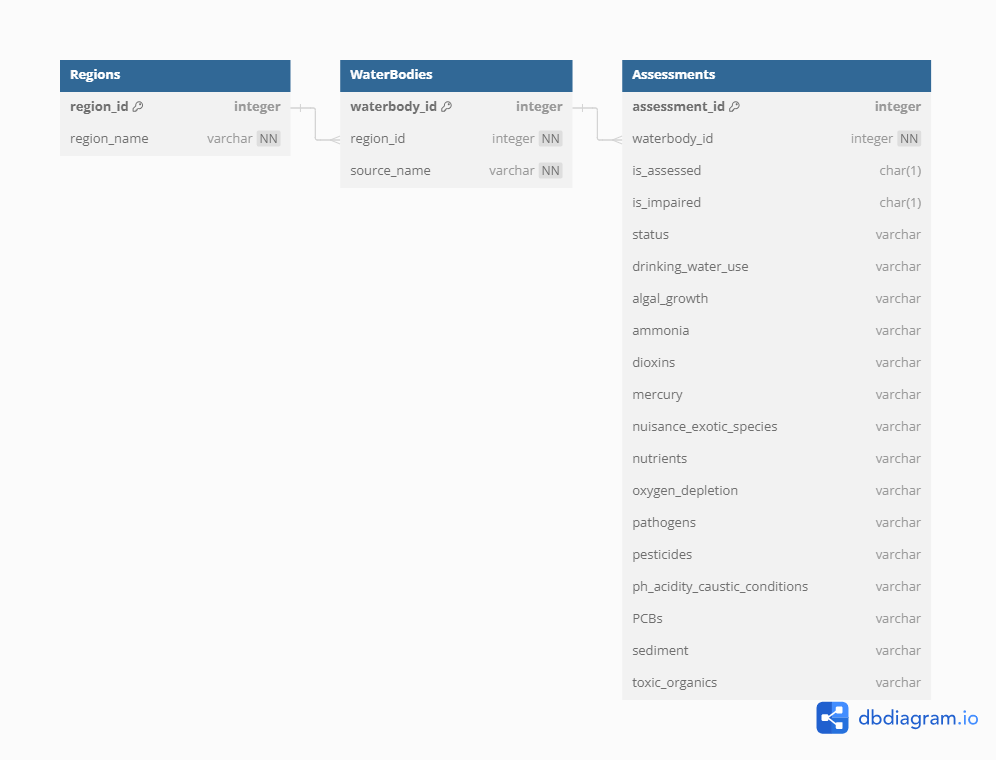

## SQL QUERIES:



    CREATE TABLE IF NOT EXISTS Regions (
        region_id SERIAL PRIMARY KEY,
        region_name VARCHAR(255) UNIQUE NOT NULL
    );
    
     CREATE TABLE IF NOT EXISTS WaterBodies (
        waterbody_id SERIAL PRIMARY KEY,
        region_id INTEGER NOT NULL,
        source_name VARCHAR(255) NOT NULL,
        FOREIGN KEY (region_id) REFERENCES Regions (region_id)
    );
    
     CREATE TABLE IF NOT EXISTS Assessments (
        assessment_id SERIAL PRIMARY KEY,
        waterbody_id INTEGER NOT NULL,
        is_assessed CHAR(1),
        is_impaired CHAR(1),
        status VARCHAR(255),
        drinking_water_use VARCHAR(255),
        algal_growth VARCHAR(255),
        ammonia VARCHAR(255),
        dioxins VARCHAR(255),
        mercury VARCHAR(255),
        nuisance_exotic_species VARCHAR(255),
        nutrients VARCHAR(255),
        oxygen_depletion VARCHAR(255),
        pathogens VARCHAR(255),
        pesticides VARCHAR(255),
        ph_acidity_caustic_conditions VARCHAR(255),
        PCBs VARCHAR(255),
        sediment VARCHAR(255),
        toxic_organics VARCHAR(255),
        FOREIGN KEY (waterbody_id) REFERENCES WaterBodies (waterbody_id)
    );
    

### Establishing a connection to database, prior to this created a database called WaterQuality with the structure shown in ER diagram above.

In [20]:
def connect():
    # Setting postgres connection URL.
    conn_params = {
    "host": "localhost",
    "database": "WaterQuality",
    "user": "postgres",
    "password": "1999"
}
    conn = psycopg2.connect(**conn_params)
    print("Connected!")
    cursor = conn.cursor()
    return conn, cursor

#Connecting to DB
conn, cur = connect()

Connected!


### Data Loading:
#### Inserting the data which is retrieved from API into postgres Database.

In [12]:
for index, row in df.iterrows():
    cur.execute("INSERT INTO Regions (region_name) VALUES (%s) ON CONFLICT DO NOTHING;", (row['region'],))
conn.commit()

for index, row in df.iterrows():
    cur.execute("SELECT region_id FROM Regions WHERE region_name = %s;", (row['region'],))
    region_id = cur.fetchone()[0]
    cur.execute("INSERT INTO WaterBodies (region_id, source_name) VALUES (%s, %s);", (region_id, row['sourceName']))
conn.commit()

# Insert data into Assessments table using waterbody IDs
for index, row in df.iterrows():
    cur.execute("SELECT waterbody_id FROM WaterBodies WHERE source_name = %s;", (row['sourceName'],))
    waterbody_id = cur.fetchone()[0]
    cur.execute("""INSERT INTO Assessments (waterbody_id, is_assessed, is_impaired, status, drinking_water_use, algal_growth, ammonia, dioxins, mercury, nuisance_exotic_species, nutrients, oxygen_depletion, pathogens, pesticides, ph_acidity_caustic_conditions, PCBs, sediment, toxic_organics) VALUES 
                (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""", 
                (waterbody_id, row['isAssessed'], row['isImpaired'], row['status'], row['drinkingWaterUse'], row['algalGrowth'], row['ammonia'], row['dioxins'], row['mercury'], row['nuisanceExoticSpecies'], row['nutrients'], row['oxygenDepletion'], row['pathogens'], row['pesticides'], row['phAcidityCausticConditions'], row['PCBs'], row['sediment'], row['toxicOrganics']))

# Commit to save the changes and close the connection
conn.commit()


### Creating a dataframe via querying postgres database.

In [21]:
query = """
SELECT 
    R.region_name AS region,
    W.source_name AS sourceName,
    A.is_assessed AS isAssessed,
    A.is_impaired AS isImpaired,
    A.status,
    A.drinking_water_use AS drinkingWaterUse,
    A.algal_growth AS algalGrowth,
    A.ammonia,
    A.dioxins,
    A.mercury,
    A.nuisance_exotic_species AS nuisanceExoticSpecies,
    A.nutrients,
    A.oxygen_depletion AS oxygenDepletion,
    A.pathogens,
    A.pesticides,
    A.ph_acidity_caustic_conditions AS phAcidityCausticConditions,
    A.PCBs,
    A.sediment,
    A.toxic_organics AS toxicOrganics
FROM 
    Regions R
JOIN 
    WaterBodies W ON R.region_id = W.region_id
JOIN 
    Assessments A ON W.waterbody_id = A.waterbody_id
ORDER BY 
    W.waterbody_id;
"""
# Execute query and load into DataFrame
df = pd.read_sql(query, conn)

cur.close()
conn.close()
    
# Display the DataFrame    
df.head()



C:\Users\manoj\AppData\Local\Temp\ipykernel_37200\2874774911.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,region,sourcename,isassessed,isimpaired,status,drinkingwateruse,algalgrowth,ammonia,dioxins,mercury,nuisanceexoticspecies,nutrients,oxygendepletion,pathogens,pesticides,phaciditycausticconditions,pcbs,sediment,toxicorganics
0,New York,"Chautauqua Lake, South",Y,Y,Not Supporting,Not Supporting,Cause,Not a cause,Not a cause,Not a cause,Cause,Cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause
1,New York,"Mohawk River, Lower, Main Stem",Y,N,Fully Supporting,Fully Supporting,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause
2,New York,"Halfway Creek, Upper, and tribs",Y,N,Fully Supporting,Fully Supporting,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause
3,New York,"Minor Tribs to Seneca Lake, Northwest",Y,N,Fully Supporting,Fully Supporting,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause
4,New York,New Croton Reservoir,Y,Y,Not Supporting,Not Supporting,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause,Not a cause


## 5.Prepped Data Review:

#### A basic review of the prepped data by examining missing values, summary statistics, and unique values of categorical variables. 

__Missing Values:__ The code calculates the sum of missing values for each column in the DataFrame (df) using the isnull() function. This provides insight into which columns contain missing data.

__Summary Statistics:__ The describe() function generates summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and quartile values. This offers a quick overview of the distribution and range of numerical data.

__Unique Values:__ The nunique() function is used to count the number of unique values in each column of the DataFrame. This is particularly useful for categorical variables, as it helps identify the variety and frequency of different categories within each column.

In [5]:
# Basic information/description of the data.
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Explore unique values of categorical variables
print("\nUnique values:\n", df.nunique())

Missing values:
 region                        0
sourceName                    0
isAssessed                    0
isImpaired                    0
status                        0
drinkingWaterUse              0
algalGrowth                   0
ammonia                       0
dioxins                       0
mercury                       0
nuisanceExoticSpecies         0
nutrients                     0
oxygenDepletion               0
pathogens                     0
pesticides                    0
phAcidityCausticConditions    0
PCBs                          0
sediment                      0
toxicOrganics                 0
dtype: int64

Summary statistics:
           region              sourceName isAssessed isImpaired  \
count         74                      74         74         74   
unique         1                      74          1          2   
top     New York  Chautauqua Lake, South          Y          N   
freq          74                       1         74         53   

         

#### It can be seen in the above output that there are no missing values and column statistics and unique values shows that data is ready for further analysis.

## 6.Exploratory Data Analysis (EDA):

### Plot representing water bodies which support vs doesn't support feasablity of consupmtion of water for drinking.

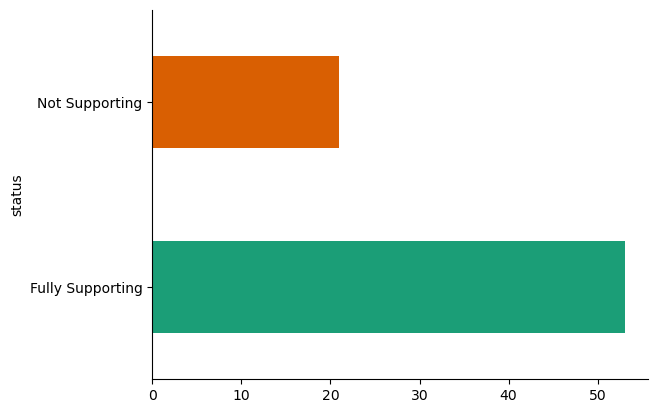

In [19]:
df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


#### It can seen  in the above bar plot that 75.67 percent is supporting 24.4 percent of water bodies does not support the consumption of drinking water due to varoius causes which can be seen in further analysis. 

### Plot Representing Count of Different Causes for Drinking Water Use Not Being Supported

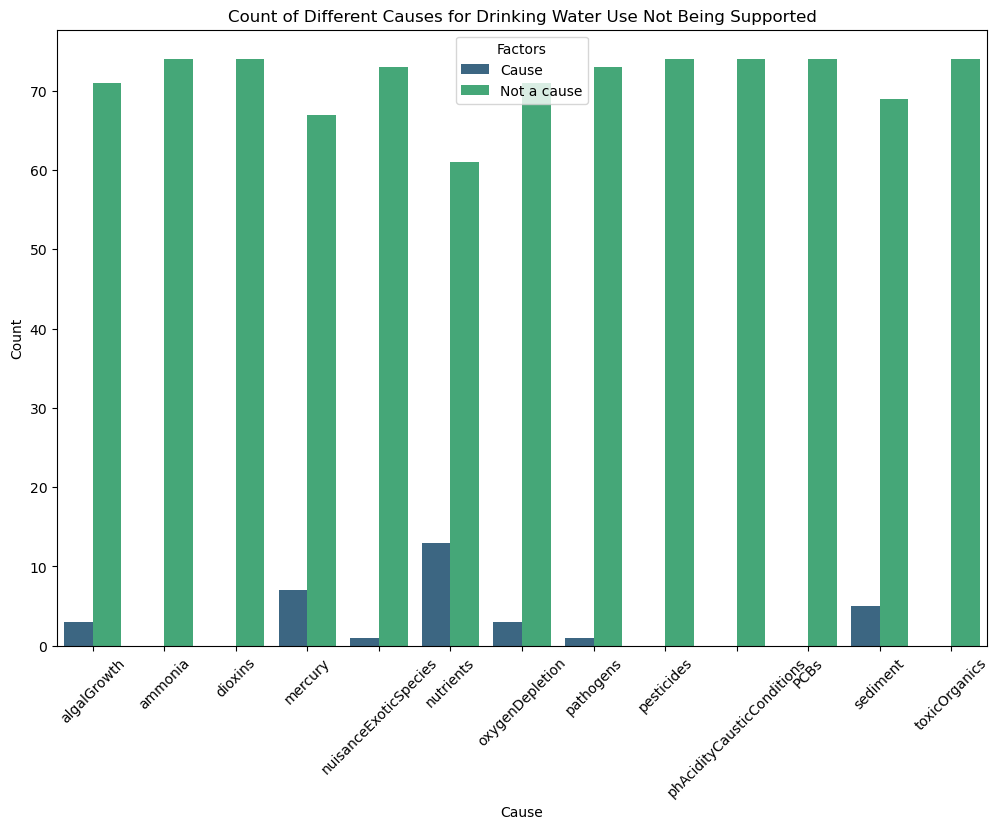

In [7]:
# Melt the dataframe to long format for easy plotting
melted_df = pd.melt(df, id_vars=['region', 'sourceName', 'isAssessed', 'isImpaired', 'status', 'drinkingWaterUse'],
                    var_name='Cause', value_name='Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=melted_df, x='Cause', hue='Count', palette='viridis')
plt.title('Count of Different Causes for Drinking Water Use Not Being Supported')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Factors')
plt.show()

#### Above bar plot provides insights into the factors affecting the usability of drinking water,

1. __Cause:__
   - Specific reasons directly impacting water usability are categorized as "Cause."
   - These elements play a significant role in hindering water support.
   - Examples include nuisanceExoticSpecies, sediment and mercury.

2. __Not a Cause:__
   - Some elements are labeled as "Not a cause."
   - These do not negatively affect drinking water support.
   - Examples include pH, ammonia, and dioxins.

In summary, understanding these factors, causes, and non-causes is crucial for addressing challenges related to drinking water availability and quality.

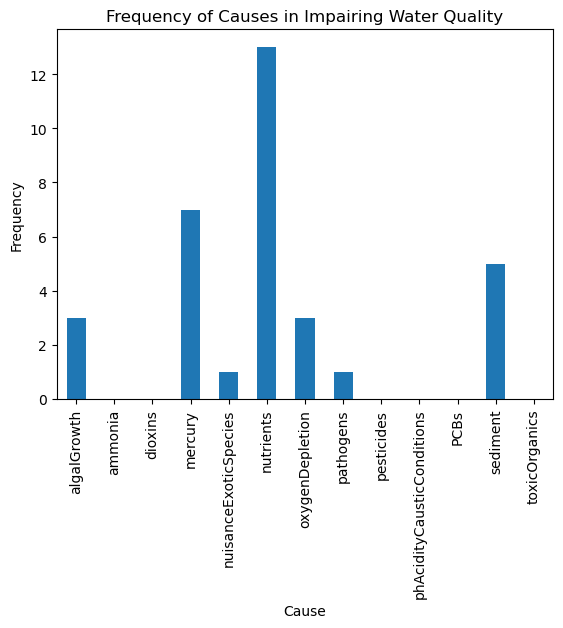

In [8]:
# Convert 'Cause'/'Not a cause' into a numerical format for easier aggregation
cause_columns = ['algalGrowth', 'ammonia', 'dioxins', 'mercury', 'nuisanceExoticSpecies', 'nutrients', 'oxygenDepletion', 'pathogens', 'pesticides', 'phAcidityCausticConditions', 'PCBs', 'sediment', 'toxicOrganics']
for col in cause_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Cause' else 0)

# Stacked Bar Chart
cause_sums = df[cause_columns].sum()
cause_sums.plot(kind='bar', stacked=True)
plt.title('Frequency of Causes in Impairing Water Quality')
plt.xlabel('Cause')
plt.ylabel('Frequency')
plt.show()


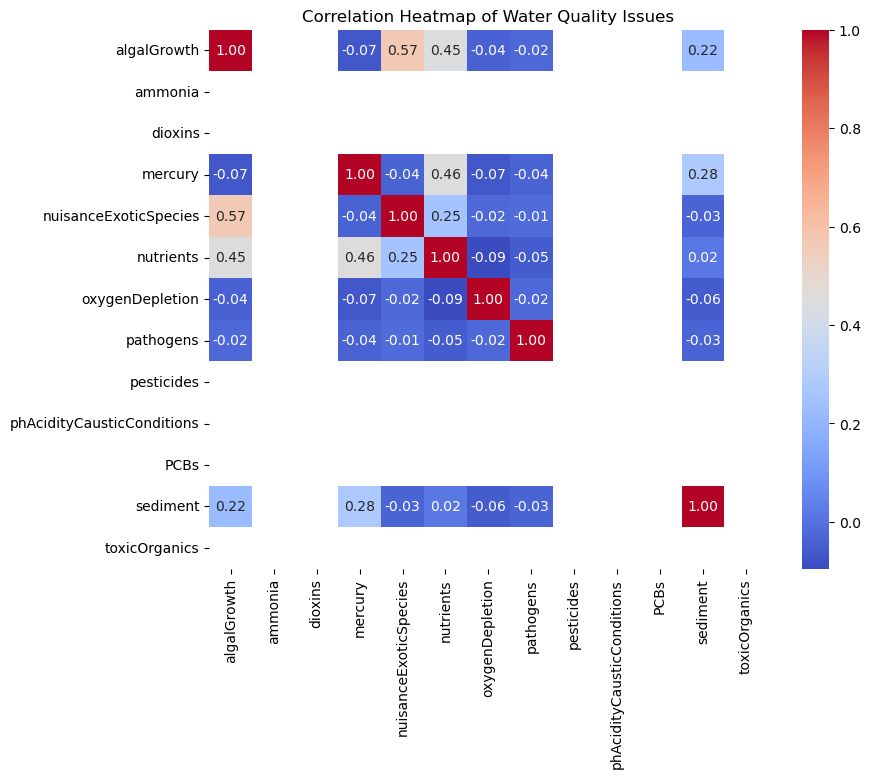

In [9]:
# Heatmap of Correlation
plt.figure(figsize=(9, 7))
sns.heatmap(df[cause_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Issues')
plt.show()


#### The above heatmap shows the correlation coefficients between various water quality issues,


#### Observations from the Heatmap
__1. Strong Positive Correlations:__
   - The correlation between `algaeGrowth` and `nuisanceExoticSpecies` is 0.57, indicating that locations with algae growth have more nuisance exotic species.
   - `nutrients` and `oxygenDepletion`: 1.00, meaning that higher nutrient levels are exactly associated with increased oxygen depletion, which is common since excess nutrients can cause eutrophication and consequent oxygen depletion in water bodies.

__2. Moderate to Weak Correlations:__
   - `algaeGrowth` and `nutrients`: 0.45, indicating a slight correlation in which increased nutrient levels may encourage algae growth.
   - `sediment` and `algaeGrowth`: 0.22, demonstrating a weak positive association, which could imply that more sediment contributes to conditions suitable for algae growth.
   
__3. Negative or No Correlation:__
   - `mercury` and `algaeGrowth`: -0.07, showing a very weak negative correlation, implying that mercury presence has little to no direct relationship with algae growth.
   - Several pairs like `pesticides` and other variables show no correlation data (blank cells), possibly indicating that data wasn't available or the correlation is negligibly small.



## Data Preparation for CSV file:

### The dataset contains 141,318 entries and 10 columns. Here's a brief overview of the columns and their data types:

__Sample Number:__ Identifier for each sample (integer).

__Sample Date:__ Date of sample collection (string).

__Sample Time:__ Time of sample collection (string).

__Sample Site:__ Identifier for the sample site (string).

__Sample class:__ Type of sample, such as "Compliance" or "Operational" (string).

__Residual Free Chlorine (mg/L):__ Concentration of residual free chlorine (float).

__Turbidity (NTU):__ Turbidity measurement, which should be a numeric value but is recorded as a string.

__Fluoride (mg/L):__ Fluoride concentration, also recorded as a string, and many values are missing.

__Coliform (Quanti-Tray) (MPN /100mL) and E.coli(Quanti-Tray) (MPN/100mL):__ Measurements for coliform and E.coli, recorded as strings with "<1" indicating non-detect levels.

In [10]:
# Load and prepare the data
water_data_link = 'https://raw.githubusercontent.com/manoj2005/DAM_FinalProject/main/Drinking_Water_Quality_Distribution_Monitoring_Data_20240505.csv'
data = pd.read_csv(water_data_link,low_memory=False)
data = pd.DataFrame(data)
data = data.rename(columns={
    'Sample Number': 'id',
    'Sample Date': 'date',
    'Sample Time': 'time',
    'Sample Site': 'testFacilityId',
    'Sample class': 'class',
    'Residual Free Chlorine (mg/L)': 'chlorine(mg/L)',
    'Turbidity (NTU)': 'turbidity(NTU)',
    'Fluoride (mg/L)': 'fluoride(mg/L)',
    'Coliform (Quanti-Tray) (MPN /100mL)': 'coliform(MPN/100mL)',
    'E.coli(Quanti-Tray) (MPN/100mL)': 'e.coli(MPN/100mL)'
})
data.head()

,id,date,time,testFacilityId,class,chlorine(mg/L),turbidity(NTU),fluoride(mg/L),coliform(MPN/100mL),e.coli(MPN/100mL)
0,201655703,08/09/2016,10:31,43250,Compliance,0.68,0.74,NaN,<1,<1
1,201655704,08/09/2016,11:27,46850,Compliance,0.81,1.45,NaN,<1,<1
2,201655705,08/09/2016,10:14,50200,Operational,0.79,0.74,NaN,<1,<1
3,201655706,08/09/2016,12:12,50300,Operational,0.92,0.63,NaN,<1,<1
4,201655707,08/09/2016,10:17,76550,Compliance,0.06,0.6,NaN,<1,<1


## Data Cleaning:

__1. Converting to Numeric:__ 
   - The first three lines convert the columns 'chlorine(mg/L)', 'fluoride(mg/L)', and 'turbidity(NTU)' to numeric values. With the `errors='coerce'` parameter to handle any non-numeric values by converting them to NaN (Not a Number).

__2. Handling '>' Values:__
   - The `handle_greater_than` function is defined to convert 'Coliform' and 'E.coli' to numeric values.
   - For example, '>2.5' would be converted to 2.5. 
   - Additionally, it replaces the '<1' values with 0.

__3. Data Verification:__
   - Finally, the `describe()` function is used to provide descriptive statistics (such as count, mean, standard deviation, minimum, and maximum) for the columns 'chlorine(mg/L)', 'fluoride(mg/L)', 'turbidity(NTU)', 'coliform(MPN/100mL)', and 'e.coli(MPN/100mL)'. This helps to verify the changes made to the dataset.


In [11]:
# Converting 'chlorine(mg/L)' ,'Fluoride (mg/L)' and 'Turbidity (NTU)' to numeric.
data['chlorine(mg/L)'] = pd.to_numeric(data['chlorine(mg/L)'], errors='coerce')
data['fluoride(mg/L)'] = pd.to_numeric(data['fluoride(mg/L)'], errors='coerce')
data['turbidity(NTU)'] = pd.to_numeric(data['turbidity(NTU)'], errors='coerce')

# Function to handle values with '>'
def handle_greater_than(value):
    if isinstance(value, str) and value.startswith('>'):
        return float(value[1:])  # Take the numeric part only
    return value

# Apply the above function to the 'Coliform' and 'E.coli' columns
data['coliform(MPN/100mL)'] = data['coliform(MPN/100mL)'].apply(handle_greater_than).replace('<1', 0).astype(float)
data['e.coli(MPN/100mL)'] = data['e.coli(MPN/100mL)'].apply(handle_greater_than).replace('<1', 0).astype(float)

# Verify the changes
data[['chlorine(mg/L)','fluoride(mg/L)','turbidity(NTU)','coliform(MPN/100mL)', 'e.coli(MPN/100mL)']].describe()

,chlorine(mg/L),fluoride(mg/L),turbidity(NTU),coliform(MPN/100mL),e.coli(MPN/100mL)
count,141269.000000,18629.000000,140436.000000,141202.000000,141202.000000
mean,0.563998,0.708552,0.734093,0.128522,-0.000014
std,0.214924,0.054935,0.254545,4.476072,0.025247
min,-9.990000,0.030000,0.100000,-9.000000,-9.000000
25%,0.420000,0.690000,0.630000,0.000000,0.000000
50%,0.570000,0.710000,0.730000,0.000000,0.000000
75%,0.710000,0.730000,0.850000,0.000000,0.000000
max,2.200000,0.890000,33.800000,200.500000,2.000000


### Data Preparation Steps:
1.Convert "Date" to datetime for better analysis of temporal patterns.

2.Clean and convert "Turbidity (NTU)" and "Fluoride (mg/L)" to numeric values.

3.Address the non-numeric representation of bacterial counts ("<1") in the "Coliform" and "E.coli" columns.

4.Handle missing values appropriately, based on the context of missing data.

In [12]:
# Convert 'date' to datetime format, auto-detecting the format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Define a function to convert date to seasons
def date_to_season(month):
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'
    else:
        return 'Winter'

data['Season'] = data['date'].dt.month.apply(date_to_season)

# Check the updated DataFrame
data.head()

,id,date,time,testFacilityId,class,chlorine(mg/L),turbidity(NTU),fluoride(mg/L),coliform(MPN/100mL),e.coli(MPN/100mL),Season
0,201655703,2016-08-09,10:31,43250,Compliance,0.68,0.74,NaN,0.0,0.0,Summer
1,201655704,2016-08-09,11:27,46850,Compliance,0.81,1.45,NaN,0.0,0.0,Summer
2,201655705,2016-08-09,10:14,50200,Operational,0.79,0.74,NaN,0.0,0.0,Summer
3,201655706,2016-08-09,12:12,50300,Operational,0.92,0.63,NaN,0.0,0.0,Summer
4,201655707,2016-08-09,10:17,76550,Compliance,0.06,0.60,NaN,0.0,0.0,Summer


#### It can be seen in the above output that dates have been mapped to their corresponding seasons and string values such as `<0.2` have been converted into numeric values, this makes the csv data is ready for further seasonal analysis.

## 7.Investigative Analysis & Results:

### Seasonal distribution on water quality:

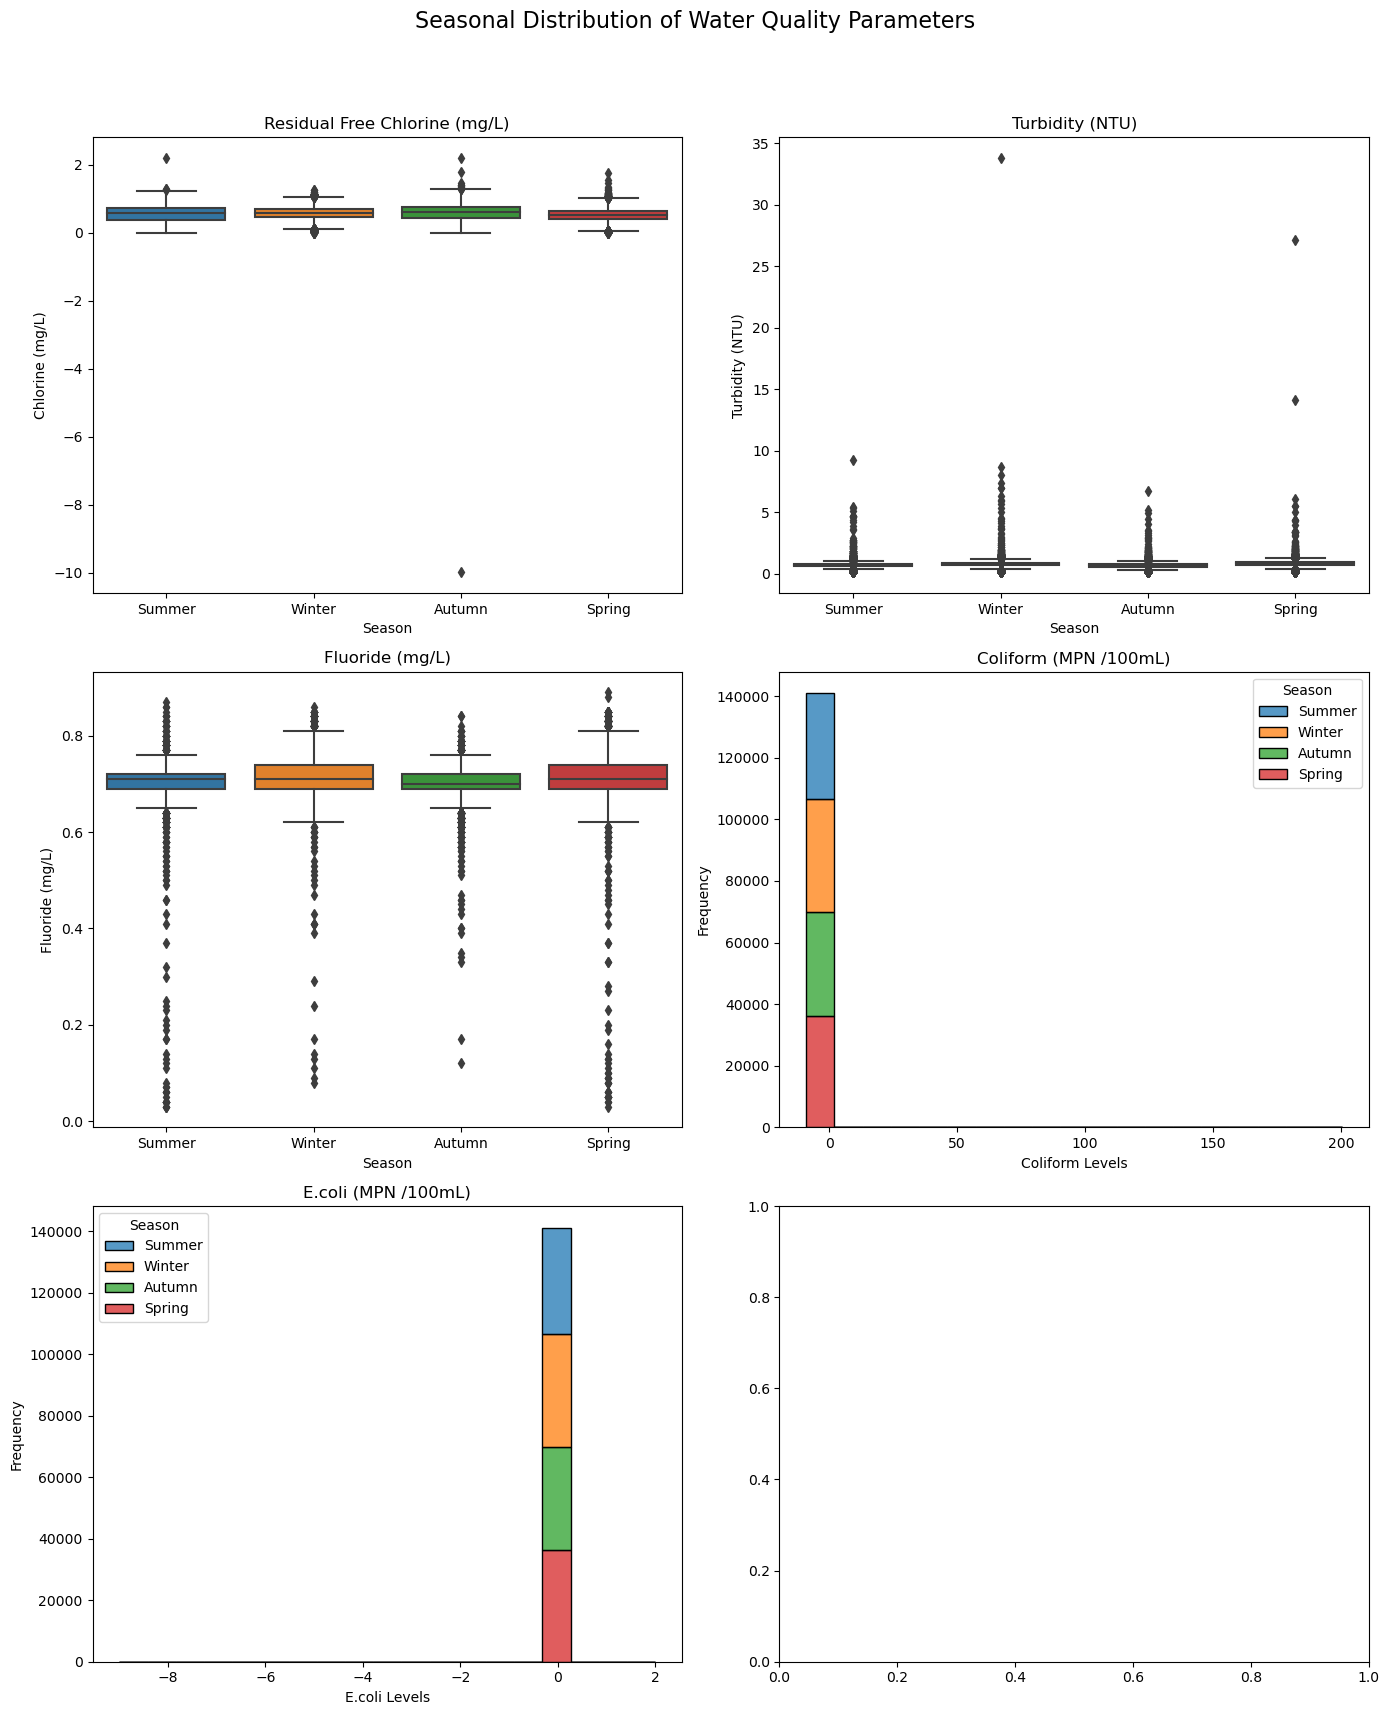

In [13]:
# Figure for combine plots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Seasonal Distribution of Water Quality Parameters', fontsize=16)

# Plot for Residual Free Chlorine
sns.boxplot(ax=axes[0, 0], x='Season', y='chlorine(mg/L)', data=data)
axes[0, 0].set_title('Residual Free Chlorine (mg/L)')
axes[0, 0].set_ylabel('Chlorine (mg/L)')
axes[0, 0].set_xlabel('Season')

# Plot for Turbidity
sns.boxplot(ax=axes[0, 1], x='Season', y='turbidity(NTU)', data=data)
axes[0, 1].set_title('Turbidity (NTU)')
axes[0, 1].set_ylabel('Turbidity (NTU)')
axes[0, 1].set_xlabel('Season')

# Plot for Fluoride
sns.boxplot(ax=axes[1, 0], x='Season', y='fluoride(mg/L)', data=data)
axes[1, 0].set_title('Fluoride (mg/L)')
axes[1, 0].set_ylabel('Fluoride (mg/L)')
axes[1, 0].set_xlabel('Season')

# Plot for Coliform
sns.histplot(ax=axes[1, 1], data=data, x='coliform(MPN/100mL)', hue='Season', multiple='stack')
axes[1, 1].set_title('Coliform (MPN /100mL)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlabel('Coliform Levels')

# Plot for E.coli
sns.histplot(ax=axes[2, 0], data=data, x='e.coli(MPN/100mL)', hue='Season', multiple='stack')
axes[2, 0].set_title('E.coli (MPN /100mL)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlabel('E.coli Levels')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


### Here are the visualizations reflecting the seasonal distribution of water quality parameters:

__Residual Free Chlorine (mg/L):__
The boxplot shows some seasonal variability in chlorine levels. Most values are within the acceptable range (0.3-1 mg/L), but there are some outliers, particularly in certain seasons.

__Turbidity (NTU):__
Turbidity levels vary significantly across seasons. There are notable instances where turbidity exceeds the acceptable limit of 1 NTU, particularly in some seasons, indicating potential issues during those times.

__Fluoride (mg/L):__
The fluoride levels are mostly below the limit of 0.7 mg/L where data is available. However, the presence of outliers suggests that there are occasional exceedances.

__Coliform (MPN/100mL) and E.coli (MPN/100mL):__
Both parameters are primarily at levels indicating non-detectable (represented by 0). This is consistent across all seasons, suggesting effective control of bacterial contamination in the water supply.

In [14]:
# Define conditions for non-compliance
conditions = {
    'Chlorine (mg/L)': ((data['chlorine(mg/L)'] < 0.3) | (data['chlorine(mg/L)'] > 1)),
    'Turbidity (NTU)': (data['turbidity(NTU)'] > 1),
    'Fluoride (mg/L)': (data['fluoride(mg/L)'] > 0.7),
    'Coliform (MPN/100mL)': (data['coliform(MPN/100mL)'] >= 1),
    'E.coli (MPN/100mL)': (data['e.coli(MPN/100mL)'] >= 1)
}

# Create a DataFrame to hold the results
seasonal_non_compliance = pd.DataFrame(index=['Spring', 'Summer', 'Autumn', 'Winter'])

# Calculate the proportion of non-compliance for each parameter by season
for parameter, condition in conditions.items():
    non_compliance = data[condition].groupby(data['Season']).size() / data.groupby(data['Season']).size()
    seasonal_non_compliance[parameter] = non_compliance

# Display the results
seasonal_non_compliance.fillna(0)  # Fill NaN with 0 where there are no records


,Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (MPN/100mL),E.coli (MPN/100mL)
Spring,0.116609,0.151137,0.078060,0.001267,0.000055
Summer,0.175854,0.019398,0.072003,0.010452,0.000029
Autumn,0.161143,0.014255,0.062426,0.004752,0.000059
Winter,0.080896,0.081385,0.079564,0.001169,0.000027


### Here is the summary of non-compliance rates for each water quality parameter by season:

__Non-Compliance Rates:__

__Residual Free Chlorine (mg/L):__
-  Spring: 11.59%
-  Summer: 17.59%
-   Autumn: 16.11%
-   Winter: 8.09%

__Turbidity (NTU):__
-   Spring: 15.47%
-   Summer: 1.94%
-   Autumn: 1.43%
-   Winter: 8.14%

__Fluoride (mg/L):__
-   Spring: 7.83%
-   Summer: 7.20%
-   Autumn: 6.24%
-   Winter: 7.96%

__Coliform (MPN/100mL) and E.coli (MPN/100mL):__

Both contaminants show 0% non-compliance across all seasons, indicating very effective control.

__Seasonal Trends and Water Quality Concerns:__

__Residual Free Chlorine:__

Non-compliance is highest in Summer and Autumn, suggesting potential issues with maintaining adequate chlorine levels during warmer months, possibly due to increased water usage or biological activity.

__Turbidity:__

The highest non-compliance occurs in Spring, potentially due to increased runoff from spring rains. Winter also shows elevated non-compliance, which could be influenced by storm events or changes in water sources.

__Fluoride:__

Non-compliance rates are relatively consistent across seasons but are slightly higher in Winter and Spring.



## Conclusion:

Water quality tends to decrease notably in Spring for turbidity, and in Summer and Autumn for residual free chlorine levels. These seasonal patterns suggest that different water treatment strategies may be required during these times to ensure compliance with water quality standards, such as adjusting chlorine dosing in the summer or enhancing filtration during periods of high turbidity in the spring. Further investigation into specific local factors influencing these patterns could help in optimizing water treatment processes.

<h2 align="center">THANK YOU!</h2>